# Clustering

In [27]:
import pandas as pd
import ETL as etl
import numpy as np
import os
import umap_process as umap

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# Get query files function
def get_path(folder, file_path):
    current_directory = os.getcwd()
    return os.path.join(current_directory, '..', folder, file_path)

In [3]:
procesos_data = pd.read_csv(get_path('data', 'collected_obra_data_v3.csv'),
                 dtype = {'ID_ADJUDICACION': str},
                 parse_dates=['START_DATE','CONTRACT_DATE'])


In [ ]:
procesos_data.info()

In [4]:
categorical_variables = ['MUNICIPALITY_TYPE', 'REGION']
numeric_variables = ['PROJECT_INTENSITY_NORM','AWARD_GROWTH_NORM','FINAL_COST_ORIG', 'NUM_PENALTIES_ENTIDAD_LAST_Y', 'PROPORTION_DEVIATIONS_ENTIDAD_LAST_Y']
procesos_sample_data = procesos_data[categorical_variables + numeric_variables]

In [ ]:
umap_dataset = umap.umap_embed(procesos_sample_data, n_components=3)
columns = ['FIRST_COMPONENT', 'SECOND_COMPONENT', 'THIRD_COMPONENT']
umap_dataset = pd.DataFrame(umap_dataset, columns=columns)
umap_dataset

In [39]:
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(umap_dataset)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

c:\Users\nicolas.arrieta\anaconda3\envs\hospital_procurement_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
umap_dataset = pd.concat([umap_dataset, procesos_data[['HAVE_DEVIATION', 'HAVE_DEVIATION_COST', 'HAVE_DEVIATION_TIME']]], axis=1)
umap_dataset['CLUSTERS'] = labels
umap_dataset.head()

,FIRST_COMPONENT,SECOND_COMPONENT,THIRD_COMPONENT,HAVE_DEVIATION,HAVE_DEVIATION_COST,HAVE_DEVIATION_TIME,CLUSTERS
0,51.041710,5.751395,12.893487,False,False,False,0
1,52.744122,6.304783,11.494457,True,True,True,1
2,51.362541,4.762064,12.099395,True,True,False,0
3,51.185917,5.216357,11.671938,False,False,False,0
4,51.377007,5.420669,12.916426,True,True,True,0


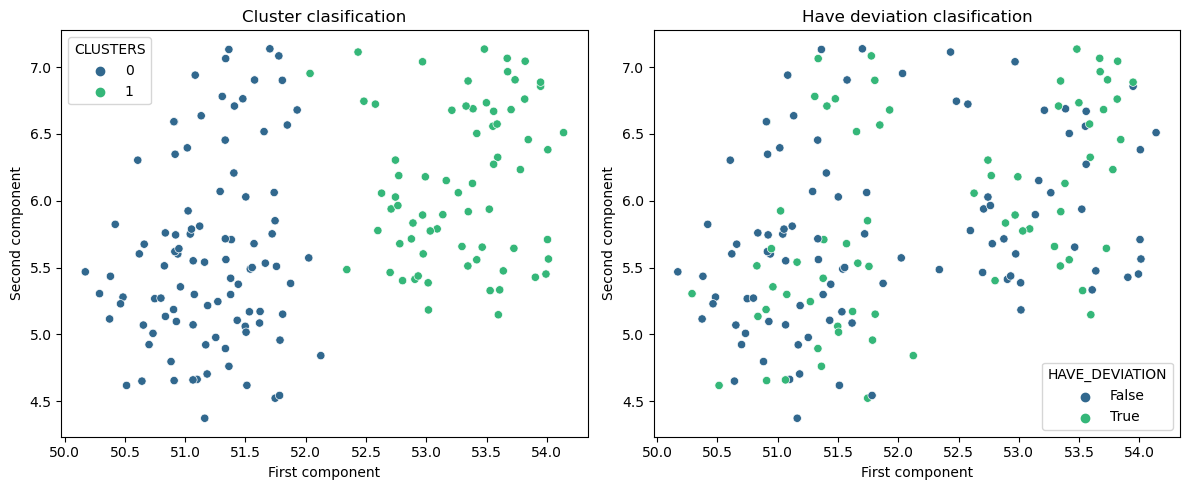

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.scatterplot(data=umap_dataset, 
                x='FIRST_COMPONENT', 
                y='SECOND_COMPONENT', 
                hue='CLUSTERS', 
                palette='viridis', 
                legend='full',
                ax=axes[0])

axes[0].set_title('Cluster clasification')
axes[0].set_xlabel('First component')
axes[0].set_ylabel('Second component')

sns.scatterplot(data=umap_dataset, 
                x='FIRST_COMPONENT', 
                y='SECOND_COMPONENT', 
                hue='HAVE_DEVIATION', 
                palette='viridis', 
                legend='full',
                ax=axes[1])

axes[1].set_title('Have deviation clasification')
axes[1].set_xlabel('First component')
axes[1].set_ylabel('Second component')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [45]:
confusion_matrix = pd.crosstab(umap_dataset['CLUSTERS'], umap_dataset['HAVE_DEVIATION'])
print(confusion_matrix)

HAVE_DEVIATION  False  True 
CLUSTERS                    
0                  59     38
1                  38     32


1. Cluster 0: 97 (39% true)
2. Cluster 1: 70 (45% true)